<a href="https://colab.research.google.com/github/CodEEBuzZ/CodEEBuzZ/blob/main/Employment_burnout_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

In [24]:
df = pd.read_excel('/employee_burnout_analysis-AI 2.xlsx')

In [25]:
import warnings
def _warn(*argv, **kwargs):
    pass
warnings.warn = _warn

import pandas as pd
pd.options.mode.chained_assignment = None
df = pd.read_excel("/employee_burnout_analysis-AI 2.xlsx")
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [26]:
df.isna().sum()

,0
Employee_ID,0
Date_of_Joining,0
Gender,0
Company_Type,0
WFH_Setup_Available,0
Designation,0
Resource_Allocation,1381
Mental_Fatigue_Score,2117
Burn_Rate,1124


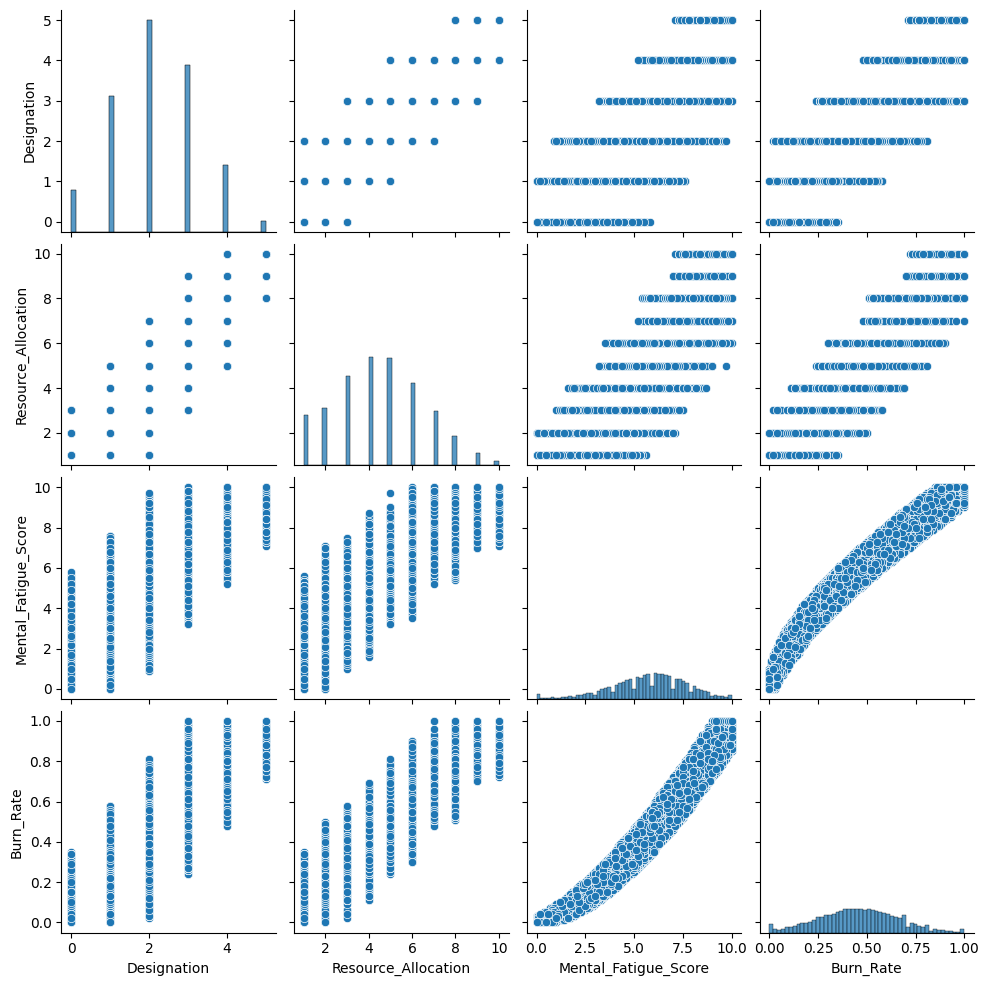

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(df)

In [28]:
df = df.dropna()
len(df)

18590

In [29]:
df.dtypes

,0
Employee_ID,object
Date_of_Joining,datetime64[ns]
Gender,object
Company_Type,object
WFH_Setup_Available,object
Designation,int64
Resource_Allocation,float64
Mental_Fatigue_Score,float64
Burn_Rate,float64


In [30]:
from pprint import pprint
df_obj = df.select_dtypes(object)
pprint({ c : df_obj[c].unique()[:10] for c in df_obj.columns})

{'Company_Type': array(['Service', 'Product'], dtype=object),
 'Employee_ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH_Setup_Available': array(['No', 'Yes'], dtype=object)}


In [31]:
df = df.drop("Employee_ID", axis=1)
df.head().T

,0,1,3,4,5
Date_of_Joining,2008-09-30 00:00:00,2008-11-30 00:00:00,2008-11-03 00:00:00,2008-07-24 00:00:00,2008-11-26 00:00:00
Gender,Female,Male,Male,Female,Male
Company_Type,Service,Service,Service,Service,Product
WFH_Setup_Available,No,Yes,Yes,No,Yes
Designation,2,1,1,3,2
Resource_Allocation,3.0,2.0,1.0,7.0,4.0
Mental_Fatigue_Score,3.8,5.0,2.6,6.9,3.6
Burn_Rate,0.16,0.36,0.2,0.52,0.29


In [33]:
import numpy as np
print(f"Min date {df.Date_of_Joining.min()}")
print(f"Max date {df.Date_of_Joining.max()}")
df_month = df.copy()
df_month["Date_of_Joining"] = df_month.Date_of_Joining.astype("datetime64")
df_month.Date_of_Joining.groupby(
        df_month.Date_of_Joining.dt.month
    ).count().plot(kind="bar", xlabel='Month', ylabel = "Hired employees")

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


TypeError: Casting to unit-less dtype 'datetime64' is not supported. Pass e.g. 'datetime64[ns]' instead.

In [34]:
dt_2008 = pd.to_datetime(["2008-01-01"]*len(df))
df["Days"] = df.Date_of_Joining.astype("datetime64").sub(dt_2008).dt.days
df.Days

TypeError: Casting to unit-less dtype 'datetime64' is not supported. Pass e.g. 'datetime64[ns]' instead.

In [44]:
df = pd.get_dummies(df, columns=['Company_Type'], drop_first=True)
df = pd.get_dummies(df, columns=['Gender', 'WFH_Setup_Available', 'Designation'], drop_first=True)
correlation = df.corr()['Burn_Rate'][df.select_dtypes(include=np.number).columns != "Burn_Rate"]
print(correlation)

KeyError: "None of [Index(['Company_Type'], dtype='object')] are in the [columns]"

In [41]:
df = df.drop(["Date_of_Joining"], axis=1)
df.head().T

,0,1,3,4,5
Gender,NaN,NaN,NaN,NaN,NaN
Company_Type,Service,Service,Service,Service,Product
WFH_Setup_Available,No,Yes,Yes,No,Yes
Designation,2,1,1,3,2
Resource_Allocation,3.0,2.0,1.0,7.0,4.0
Mental_Fatigue_Score,3.8,5.0,2.6,6.9,3.6
Burn_Rate,0.16,0.36,0.2,0.52,0.29


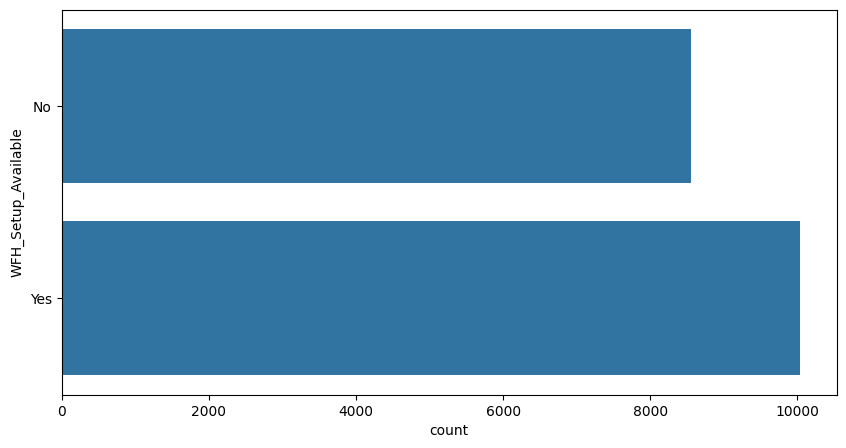

In [46]:
cat_columns = df.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10,5))
if not isinstance(ax, (np.ndarray, list)):
    ax = [ax]
for i, c in enumerate(cat_columns):
    sns.countplot(df[c], ax=ax[i])  # Now you can use ax[i] for indexing
plt.show()

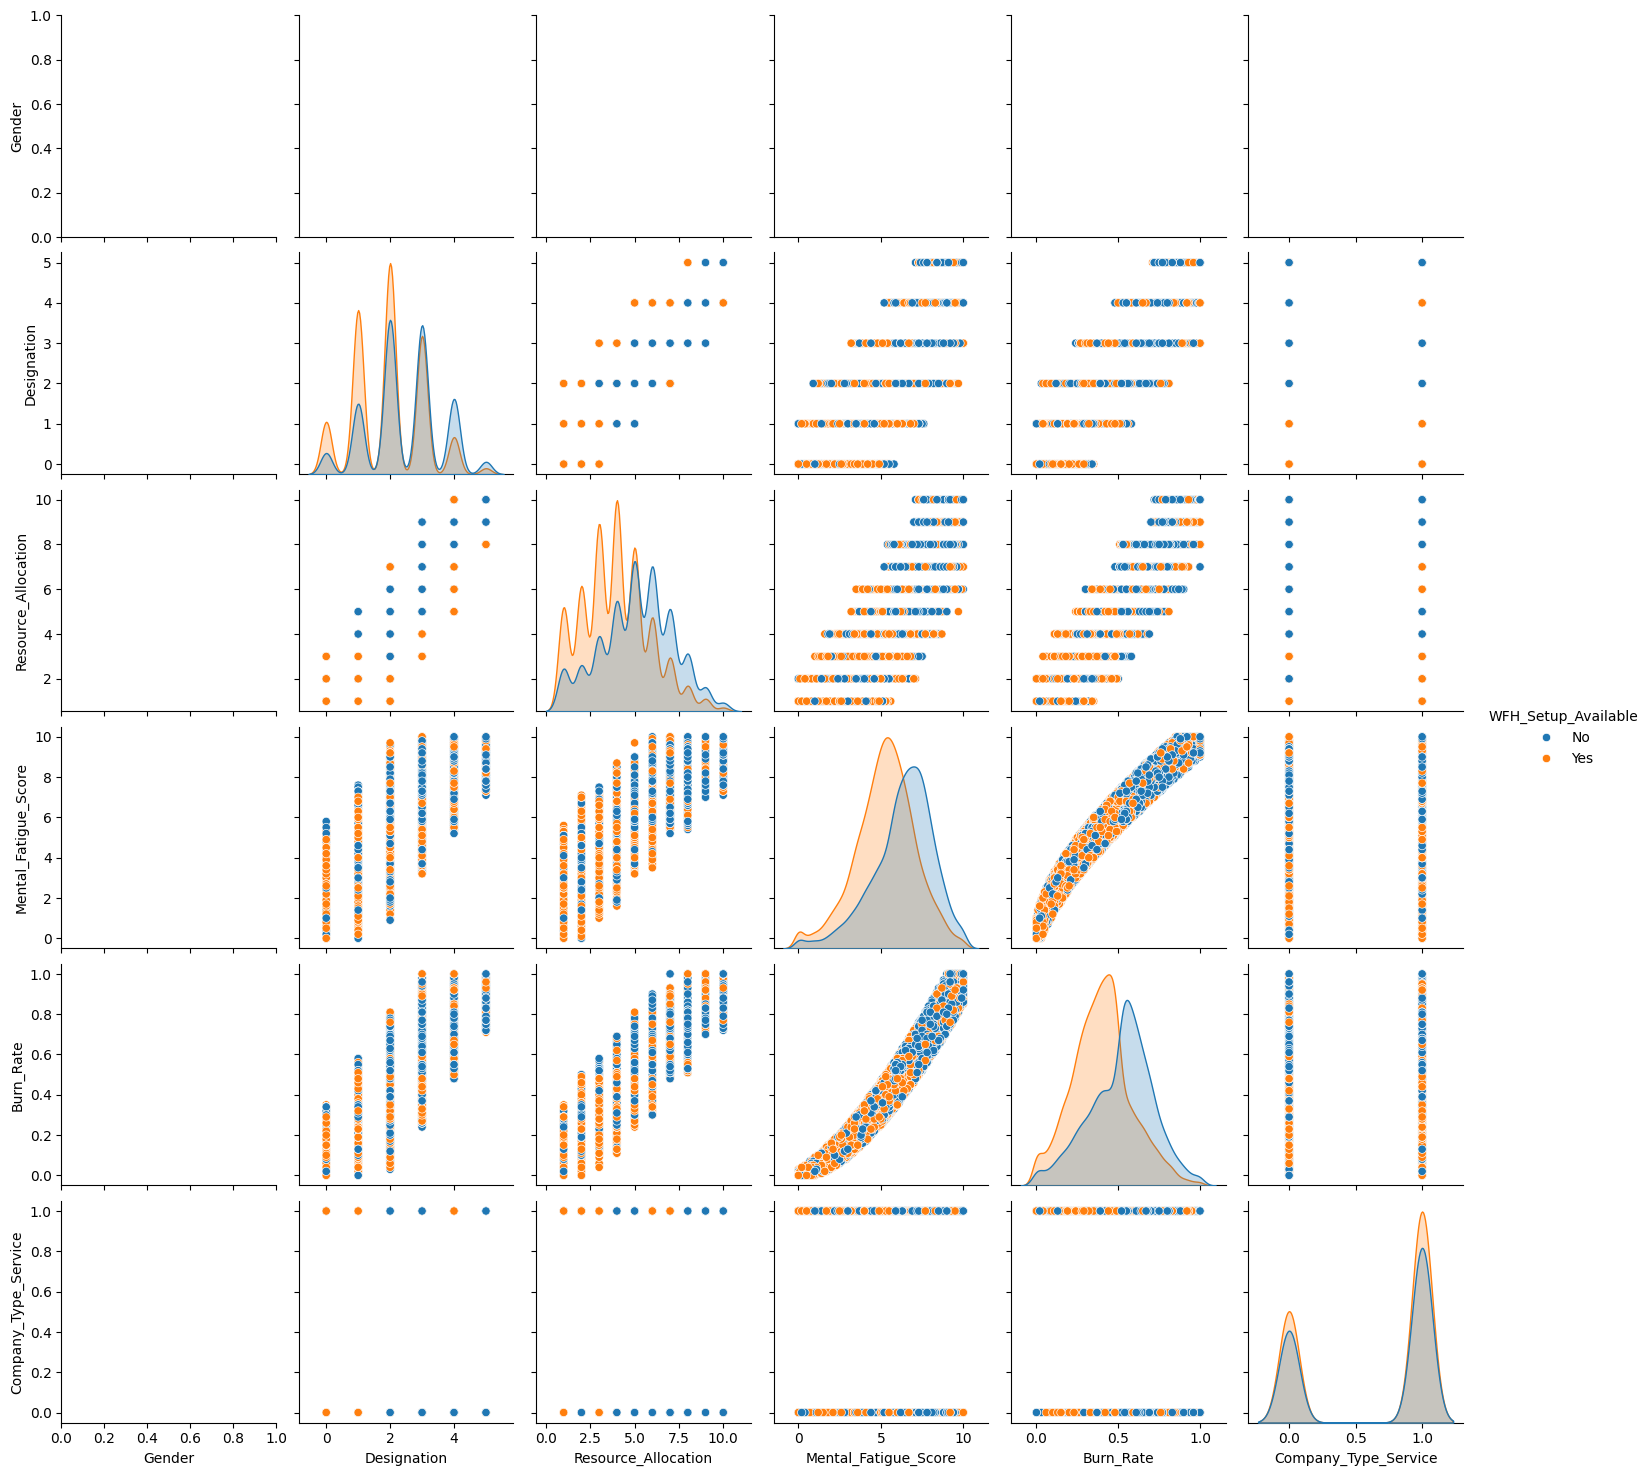

In [47]:
for c in df.select_dtypes(object).columns:
    sns.pairplot(df, hue=c)
plt.show()

In [48]:
from scipy.stats import normaltest

for c in df.select_dtypes(exclude=object):
    print(f"{c}: (p-value = {normaltest(df[c])[1]})")

Gender: (p-value = nan)
Designation: (p-value = 7.799535630459232e-52)
Resource_Allocation: (p-value = 9.214167946666707e-96)
Mental_Fatigue_Score: (p-value = 6.8137251483124435e-124)
Burn_Rate: (p-value = 1.0375928238178144e-16)
Company_Type_Service: (p-value = 0.0)


In [50]:
#Check the existing columns in the DataFrame
print(df.columns)

#If 'Company_Type', 'WFH_Setup_Available', 'Gender' are present, proceed with get_dummies:
if all(col in df.columns for col in ["Company_Type", "WFH_Setup_Available", "Gender"]):
    df = pd.get_dummies(df, columns=["Company_Type", "WFH_Setup_Available", "Gender"], drop_first=True)
else:
    print("Columns 'Company_Type', 'WFH_Setup_Available', or 'Gender' are not found in the DataFrame.")
    # Consider reloading your original data and checking which cells you have executed
    # to ensure the columns are present before applying pd.get_dummies.


df.head().T

Index(['Gender', 'WFH_Setup_Available', 'Designation', 'Resource_Allocation',
       'Mental_Fatigue_Score', 'Burn_Rate', 'Company_Type_Service'],
      dtype='object')
Columns 'Company_Type', 'WFH_Setup_Available', or 'Gender' are not found in the DataFrame.


,0,1,3,4,5
Gender,NaN,NaN,NaN,NaN,NaN
WFH_Setup_Available,No,Yes,Yes,No,Yes
Designation,2,1,1,3,2
Resource_Allocation,3.0,2.0,1.0,7.0,4.0
Mental_Fatigue_Score,3.8,5.0,2.6,6.9,3.6
Burn_Rate,0.16,0.36,0.2,0.52,0.29
Company_Type_Service,True,True,True,True,False


In [51]:
y_col = 'Burn_Rate'
df.columns
X = df[[c for c in df.columns if c != y_col]]
y = df[y_col]

print(X.shape)
print(y.shape)

(18590, 6)
(18590,)


In [56]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from typing import Dict

def create_pipeline(model_name: str, model_params: Dict):
    """Creates a pipeline with its parameters using the
    model class name and a dictionary of parameters.

    Args:
        model_name (str): Sklearn linear model class name
        model_params (Dict): Parameters of the model

    Returns:
        Tuple: Pipeline, parameters
    """
    model = getattr(linear_model, model_name)()
    estimator = Pipeline([
            ("polynomial_features", PolynomialFeatures()),
            ("scaler", StandardScaler()),
            (model_name, model)])

    params = {
        'polynomial_features__degree': [1, 2],
    }
    params.update(
        { model_name + "__" + k : v for k,v in model_params.items()}
    )

    return estimator, params

In [57]:
categorical_features = ['Company_Type', 'WFH_Setup_Available', 'Gender', 'Designation']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

results = {}

for name, params in {
    "LinearRegression": {},
    "Lasso": { "alpha" : np.geomspace(0.0001, 0.001, 50)},
    "Ridge": { "alpha" : np.geomspace(10, 15, 50)},
}.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=123)
    estimator, params = create_pipeline(name, params)

    grid = GridSearchCV(estimator, params, cv=kf,
                        scoring = make_scorer(r2_score), n_jobs=4)
    result = grid.fit(X, y)  # X and y should now be properly encoded

    print(name)
    print("="*len(name))
    print("Params:")
    pprint(result.best_params_)
    print(f"R2 score: {result.best_score_}")
    print()

    results[name] = result

KeyError: "['Company_Type'] not in index"

{'Company_Type': array(['Service', 'Product'], dtype=object),
 'Employee_ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH_Setup_Available': array(['No', 'Yes'], dtype=object)}
Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


TypeError: Casting to unit-less dtype 'datetime64' is not supported. Pass e.g. 'datetime64[ns]' instead.

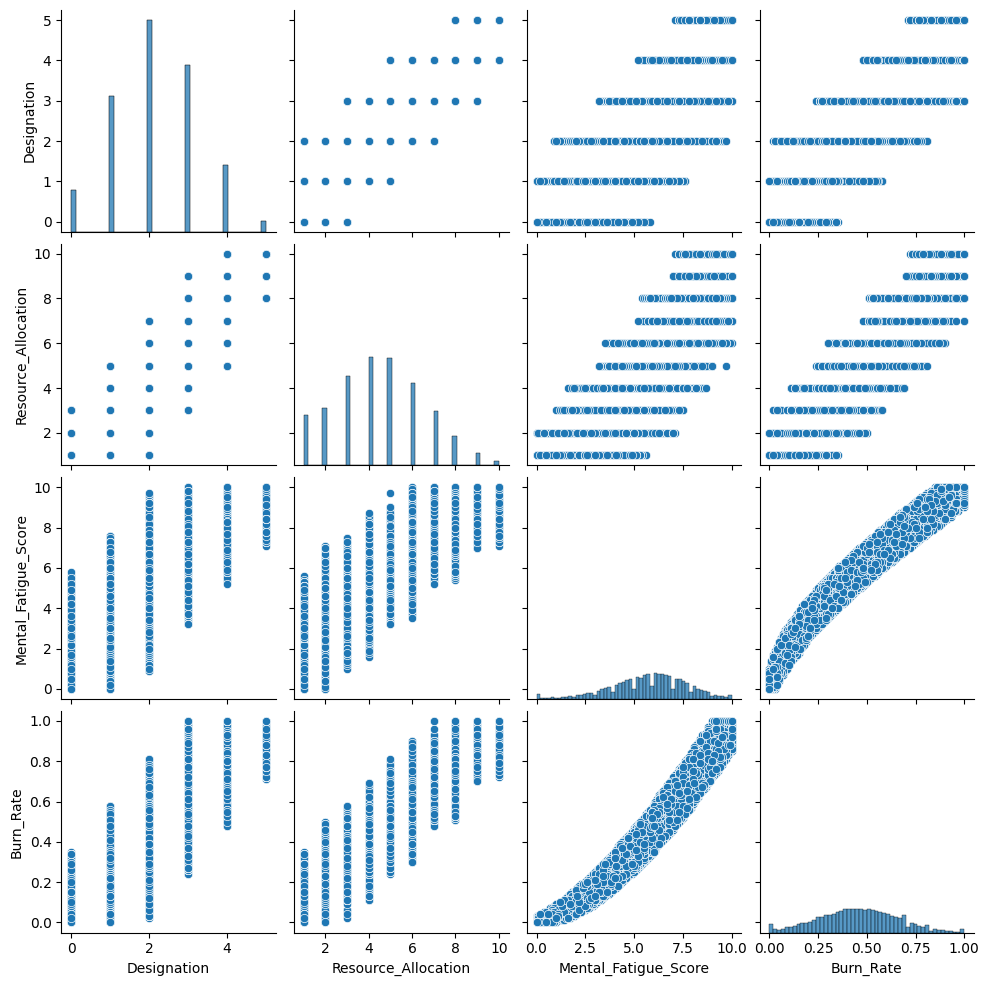

In [59]:
from IPython import get_ipython
from IPython.display import display
# %%

# %%
import pandas as pd
# %%
df = pd.read_excel('/employee_burnout_analysis-AI 2.xlsx')
# %%
import warnings
def _warn(*argv, **kwargs):
    pass
warnings.warn = _warn

import pandas as pd
pd.options.mode.chained_assignment = None
df = pd.read_excel("/employee_burnout_analysis-AI 2.xlsx")
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()
# %%
df.isna().sum()
# %%
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(df)
# %%
df = df.dropna()
len(df)
# %%
df.dtypes
# %%

# %%
from pprint import pprint
df_obj = df.select_dtypes(object)
pprint({ c : df_obj[c].unique()[:10] for c in df_obj.columns})
# %%
df = df.drop("Employee_ID", axis=1)
df.head().T
# %%
import numpy as np
print(f"Min date {df.Date_of_Joining.min()}")
print(f"Max date {df.Date_of_Joining.max()}")
df_month = df.copy()
df_month["Date_of_Joining"] = df_month.Date_of_Joining.astype("datetime64")
df_month.Date_of_Joining.groupby(
        df_month.Date_of_Joining.dt.month
    ).count().plot(kind="bar", xlabel='Month', ylabel = "Hired employees")
# %%
dt_2008 = pd.to_datetime(["2008-01-01"]*len(df))
df["Days"] = df.Date_of_Joining.astype("datetime64").sub(dt_2008).dt.days
df.Days
# %%
# We remove this cell to avoid data leakage
# df = pd.get_dummies(df, columns=['Company_Type'], drop_first=True)
# df = pd.get_dummies(df, columns=['Gender', 'WFH_Setup_Available', 'Designation'], drop_first=True)
# correlation = df.corr()['Burn_Rate'][df.select_dtypes(include=np.number).columns != "Burn_Rate"]
# print(correlation)
# %%
df = df.drop(["Date_of_Joining"], axis=1)
df.head().T
# %%


In [61]:
# In cell ipython-input-57-7f45e55775fc:
# Move get_dummies to before the X, y assignment:

# ... (Existing imports) ...
categorical_features = ['Company_Type', 'WFH_Setup_Available', 'Gender', 'Designation']
# Perform one-hot encoding before defining X and y
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

y_col = 'Burn_Rate'
df.columns
X = df[[c for c in df.columns if c != y_col]]  # Now uses the encoded DataFrame
y = df[y_col]

print(X.shape)
print(y.shape)

results = {}
# ... (Rest of your GridSearchCV code) ...

(18590, 11)
(18590,)


In [64]:
results = {}

for name, params in {
    "LinearRegression": {},
    "Lasso": { "alpha" : np.geomspace(0.0001, 0.001, 50)},
    "Ridge": { "alpha" : np.geomspace(10, 15, 50)},
}.items():
results = {}
    # GridSearchCV code

IndentationError: expected an indented block after 'for' statement on line 3 (<ipython-input-64-6a3c345be11d>, line 8)

In [69]:
# ... (Existing imports and code) ...

# Before fitting your model, modify the feature selection to exclude date columns:

y_col = 'Burn_Rate'
# Exclude 'Date_of_Joining' (and potentially 'Days') if it's causing the issue
X = df[[c for c in df.columns if c != y_col and c != 'Date_of_Joining' and c != 'Days']]
y = df[y_col]

print(X.shape)
print(y.shape)

results = {}  # Initialize results dictionary outside the loop

for name, params in {
    "LinearRegression": {},
    "Lasso": { "alpha" : np.geomspace(0.0001, 0.001, 50)},
    "Ridge": { "alpha" : np.geomspace(10, 15, 50)},
}.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=123)
    estimator, params = create_pipeline(name, params)

    grid = GridSearchCV(estimator, params, cv=kf,
                        scoring = make_scorer(r2_score), n_jobs=4)
    result = grid.fit(X, y)  # X and y should now be properly encoded

    print(name)
    print("="*len(name))
    print("Params:")
    pprint(result.best_params_)
    print(f"R2 score: {result.best_score_}")
    print()

    results[name] = result  # Store results for each model

(18590, 10)
(18590,)
LinearRegression
Params:
{'polynomial_features__degree': 2}
R2 score: 0.9252421462274245

Lasso
=====
Params:
{'Lasso__alpha': 0.0001, 'polynomial_features__degree': 2}
R2 score: 0.9250754073989995

Ridge
=====
Params:
{'Ridge__alpha': 10.0, 'polynomial_features__degree': 2}
R2 score: 0.92524030716114

